1) Загрузите данные ex2data1.txt из текстового файла.

In [1]:
DATA_PATH = '/home/ataleckij/Projects/university/mo/Data/Lab 2/'

In [2]:
files_names = !ls '{DATA_PATH}'
files_names

['ex2data1.txt', 'ex2data2.txt', 'ex2data3.mat']

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

files_paths = [os.path.join(DATA_PATH, name) for name in files_names]

In [4]:
files_paths = [os.path.join(DATA_PATH, name) for name in files_names]

сolumns = ['оценка первый экзамен', 'оценка второй экзамен', 'поступил']
df1 = pd.read_csv(files_paths[0], header=None, names=сolumns)
df1

,оценка первый экзамен,оценка второй экзамен,поступил
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


2) Постройте график, где по осям откладываются оценки по предметам, а точки обозначаются двумя разными маркерами в зависимости от того, поступил ли данный студент в университет или нет.

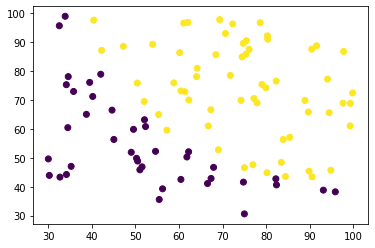

In [5]:
plt.scatter(df1['оценка первый экзамен'].values, 
            df1['оценка второй экзамен'].values, 
            c=df1['поступил'].values)
plt.show()

3) Реализуйте функции потерь J(θ) и градиентного спуска для логистической регрессии с использованием векторизации.

In [6]:
@np.vectorize
def hack_log(x):
    return np.log(x) if x != 0 else 0

def loss(y_pred, y_true):
    y_pred, y_true = np.array(y_pred), np.array(y_true)
    if np.isnan(-(y_true * hack_log(y_pred) + (1-y_true) * hack_log(1-y_pred)).mean()):
        print(y_pred)
        print(y_true)
    return -(y_true * hack_log(y_pred) + (1-y_true) * hack_log(1-y_pred)).mean()

In [7]:
@np.vectorize
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [23]:
class LogRegression:
    def __init__(self, w=None, lr=0.01):
        self.w = np.array(w) if not (isinstance(w, np.ndarray) or w is None) else w
        self.lr = lr
        self.history = []
    
    def _calc_grad(self, data_with_offset, labels):
        return ((self.predict(data_with_offset) - labels) * data_with_offset.T).T.mean(axis=0)
    
    def fit(self, data, labels, max_iters=None, optimizer='grad', verbosity=False):
        data, labels = np.array(data), np.array(labels)
        
        if self.w is None:
            self.w = np.zeros(data.shape[1] + 1)
        else:
            assert self.w.shape[0] == (data.shape[1] + 1)
        
        data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        
        if optimizer == 'grad':
            grad = self._calc_grad(data_with_offset, labels)
            zero_grad = np.zeros(grad.shape)
            iterarion = 0
            self.history.append((iterarion, loss(self.predict(data_with_offset), labels), grad))
            print(self.history[-1][:2])
            while not np.allclose(grad, zero_grad):
                self.w -= self.lr * grad
                grad = self._calc_grad(data_with_offset, labels)
                iterarion += 1
                self.history.append((iterarion, loss(self.predict(data_with_offset), labels), grad))
                if verbosity:
                    print(self.history[-1][:2])
                print(self.history[-1][:2])
                if max_iters and max_iters <= iterarion:
                    break
            print(self.history[-1][:2])
        elif optimizer == 'bfgs':
            pass
        elif optimizer == 'bfgs':
            pass
        else:
            raise NotImplementedError()
        
    
    def predict(self, data):
        data = np.array(data)
        if self.w.shape[0] == data.shape[1]:
            data_with_offset = data
        else:
            data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        return sigmoid(data_with_offset.dot(self.w))


In [9]:
from sklearn.preprocessing import StandardScaler

data1, labels1 = df1[сolumns[:-1]], df1[сolumns[-1]]

scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(data1)

lr_grad = LogRegression(lr=1)
lr_grad.fit(scaled_data1, labels1)

(0, 0.6931471805599453)
(2322, 0.2034977015894585)


4) Реализуйте другие методы (как минимум 2) оптимизации для реализованной функции стоимости (например, Метод Нелдера — Мида, Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно, генетические методы и т.п.). Разрешается использовать библиотечные реализации методов оптимизации (например, из библиотеки scipy).

In [29]:
from scipy.optimize import minimize

class LogRegression:
    def __init__(self, w=None, lr=0.01):
        self.w = np.array(w) if not (isinstance(w, np.ndarray) or w is None) else w
        self.lr = lr
        self.history = []
    
    def _calc_grad(self, data_with_offset, labels):
        return ((self.predict(data_with_offset) - labels) * data_with_offset.T).T.mean(axis=0)
    
    def fit(self, data, labels, max_iters=None, optimizer='grad', verbosity=False):
        data, labels = np.array(data), np.array(labels)
        
        if self.w is None:
            self.w = np.zeros(data.shape[1] + 1)
        else:
            assert self.w.shape[0] == (data.shape[1] + 1)
        
        data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        print(loss(self.predict(data_with_offset), labels))
        
        if optimizer == 'grad':
            grad = self._calc_grad(data_with_offset, labels)
            zero_grad = np.zeros(grad.shape)
            iterarion = 0
            self.history.append((iterarion, loss(self.predict(data_with_offset), labels), grad))
            while not np.allclose(grad, zero_grad):
                self.w -= self.lr * grad
                grad = self._calc_grad(data_with_offset, labels)
                iterarion += 1
                self.history.append((iterarion, loss(self.predict(data_with_offset), labels), grad))
                if verbosity:
                    print(self.history[-1][:2])
                if max_iters and max_iters <= iterarion:
                    break
        elif optimizer in ['BFGS', 'Nelder-Mead']:
            def goal_func(w):
                predicted_labels = LogRegression(w=w).predict(data_with_offset)
                return loss(predicted_labels, labels)
            self.w = minimize(goal_func, self.w, method=optimizer).x
        else:
            raise NotImplementedError()
        
        print(loss(self.predict(data_with_offset), labels))
        
    
    def predict(self, data):
        data = np.array(data)
        if self.w.shape[0] == data.shape[1]:
            data_with_offset = data
        else:
            data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        return sigmoid(data_with_offset.dot(self.w))

In [11]:
# from sklearn.preprocessing import StandardScaler

# data1, labels1 = df1[сolumns[:-1]], df1[сolumns[-1]]

# # scaler = StandardScaler()
# # scaled_data1 = scaler.fit_transform(data1)

lr_bfgs = LogRegression(lr=1)
lr_bfgs.fit(scaled_data1, labels1, optimizer='BFGS')

0.6931471805599453
0.2034977023510503


In [12]:
# from sklearn.preprocessing import StandardScaler

# data1, labels1 = df1[сolumns[:-1]], df1[сolumns[-1]]

# scaler = StandardScaler()
# scaled_data1 = scaler.fit_transform(data1)

lr_nm = LogRegression(lr=1)
lr_nm.fit(scaled_data1, labels1, optimizer='Nelder-Mead')

0.6931471805599453
0.2034977015994987


5) Реализуйте функцию предсказания вероятности поступления студента в зависимости от значений оценок по экзаменам

In [13]:
optimizer_to_model = {
    'grad': lr_grad,
    'BFGS': lr_bfgs,
    'Nelder-Mead': lr_nm
}

def proba_entered_the_university(mark1, mark2, optimizer='grad'):
    data = scaler.transform([[mark1, mark2]])
    model = optimizer_to_model[optimizer]
    proba = model.predict(data)[0]
    return proba

In [14]:
print(proba_entered_the_university(60, 70, optimizer='grad'))
print(proba_entered_the_university(60, 70, optimizer='BFGS'))
print(proba_entered_the_university(60, 70, optimizer='Nelder-Mead'))

0.7884454969802566
0.788425349418878
0.7884474502419888


6) Постройте разделяющую прямую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 2.

In [15]:
lr_grad.w

array([1.71844868, 3.99278587, 3.72513483])

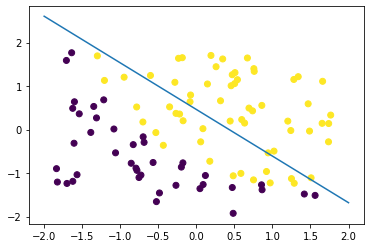

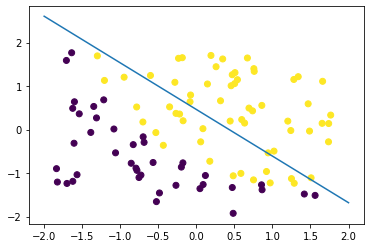

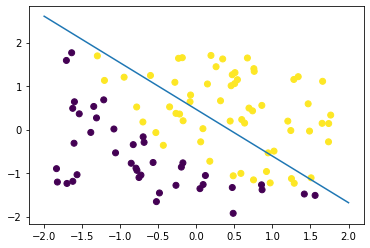

In [16]:
x = np.linspace(-2, 2, 100)

w_grad = lr_grad.w
w_bfgs = lr_bfgs.w
w_nm = lr_nm.w

def get_foo(w):
    @np.vectorize
    def foo(x):
        return -w[1]*x/w[2] + w[0]/w[2] 
    return foo

plt.scatter(scaled_data1[:, 0], 
            scaled_data1[:, 1], 
            c=labels1)
plt.plot(x, get_foo(w_grad)(x))
plt.show()

plt.scatter(scaled_data1[:, 0], 
            scaled_data1[:, 1], 
            c=labels1)
plt.plot(x, get_foo(w_bfgs)(x))
plt.show()

plt.scatter(scaled_data1[:, 0], 
            scaled_data1[:, 1], 
            c=labels1)
plt.plot(x, get_foo(w_nm)(x))
plt.show()

In [17]:
data1

,оценка первый экзамен,оценка второй экзамен
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
...,...,...
95,83.489163,48.380286
96,42.261701,87.103851
97,99.315009,68.775409
98,55.340018,64.931938


In [20]:
data1['m1sqr'] = data1.iloc[:, 0] ** 2
data1['m2sqr'] = data1.iloc[:, 1] ** 2

In [21]:
data1

,оценка первый экзамен,оценка второй экзамен,m1sqr,m2sqr
0,34.623660,78.024693,1198.797806,6087.852689
1,30.286711,43.894998,917.284849,1926.770808
2,35.847409,72.902198,1285.036716,5314.730477
3,60.182599,86.308552,3621.945269,7449.166165
4,79.032736,75.344376,6246.173368,5676.775061
...,...,...,...,...
95,83.489163,48.380286,6970.440296,2340.652054
96,42.261701,87.103851,1786.051355,7587.080849
97,99.315009,68.775409,9863.470974,4730.056948
98,55.340018,64.931938,3062.517544,4216.156573


In [39]:
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(data1)

lr_grad = LogRegression(lr=2500)
lr_grad.fit(scaled_data1, labels1, optimizer='grad', verbosity=True)

0.6931471805599453
(1, 24.63)
(2, 22.82)
(3, 18.736841834291862)
(4, 6.556119801407956)
(5, 6.9550300569184715)
(6, 4.801892223424901)
(7, 4.470114941974166)
(8, 3.4420325777469145)
(9, 3.3959716436726692)
(10, 2.437366866743784)
(11, 6.7708131300989445)
(12, 19.08)
(13, 18.621055753981356)
(14, 23.527736374037378)
(15, 29.934683654025044)
(16, 25.42423650882563)
(17, 21.154752869669508)
(18, 13.94242589934301)
(19, 17.59384891340599)
(20, 14.017152598729336)
(21, 18.092925136170194)
(22, 10.99071267897815)
(23, 15.532303731509852)
(24, 6.84)
(25, 5.815619938232892)
(26, 3.9153157402160126)
(27, 5.088781118056199)
(28, 4.004639879695206)
(29, 3.0297491429040093)
(30, 1.969752459277778)
(31, 5.338676029461847)
(32, 8.921034371160985)
(33, 19.87686114960154)
(34, 23.511653756679376)
(35, 28.507554505214006)
(36, 19.61000000036457)
(37, 24.332798510938723)
(38, 23.331337148466694)
(39, 21.216908542309962)
(40, 19.21043653389117)
(41, 15.690139689811522)
(42, 8.88)
(43, 8.25771239348911)
(

/home/ataleckij/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until



(124, 4.63)
(125, 12.224245112651838)
(126, 5.486904860195636)
(127, 12.500839467482065)
(128, 6.84937204939864)
(129, 10.309555270061773)
(130, 4.4)
(131, 12.828189554812898)
(132, 5.094955273446911)
(133, 13.162950927465891)
(134, 6.460559571551694)
(135, 10.892252033212108)
(136, 4.17)
(137, 13.410741625591777)
(138, 4.7060942284302065)
(139, 13.837286700642672)
(140, 6.184880720740431)
(141, 11.254248123126876)
(142, 4.06)
(143, 13.748472130276447)
(144, 4.4876320857259095)
(145, 14.010453393260557)
(146, 4.279196536590507)
(147, 16.549090457284173)
(148, 8.080784227891433)
(149, 8.87628801446964)
(150, 5.54)
(151, 11.398585303749101)
(152, 6.325928792427505)
(153, 11.54203918831077)
(154, 4.21)
(155, 14.060673525698022)
(156, 4.660006832909063)
(157, 10.33294848745954)
(158, 4.26)
(159, 12.851533404914743)
(160, 4.808547306565309)
(161, 15.370167475528635)
(162, 5.350000000000085)
(163, 11.761091765204196)
(164, 6.42)
(165, 11.92100275587166)
(166, 6.825713154557961)
(167, 12.089

(502, 5.55)
(503, 5.24)
(504, 2.43)
(505, 10.583214816922156)
(506, 5.840000000000049)
(507, 4.85)
(508, 2.73)
(509, 9.985282819077218)
(510, 1.25)
(511, 10.546046296423745)
(512, 5.700000000000005)
(513, 5.18)
(514, 2.59)
(515, 10.36990806220926)
(516, 1.11)
(517, 10.936198553306681)
(518, 5.57)
(519, 5.51)
(520, 2.45)
(521, 10.74857938093024)
(522, 1.04)
(523, 11.24201521294289)
(524, 5.51)
(525, 5.73)
(526, 2.4)
(527, 10.99088285990641)
(528, 0.92)
(529, 11.609135652311116)
(530, 8.181762950683812)
(531, 12.47)
(532, 2.73)
(533, 10.85)
(534, 1.24)
(535, 11.344599940451008)
(536, 4.640000000000001)
(537, 5.64)
(538, 1.54)
(539, 11.100070992302479)
(540, 4.940000004235479)
(541, 5.25)
(542, 1.84)
(543, 10.40380873215605)
(544, 5.244181653676911)
(545, 6.66)
(546, 1.84)
(547, 12.125439694970666)
(548, 8.019866918874964)
(549, 12.77)
(550, 2.51)
(551, 11.22)
(552, 1.03)
(553, 11.72052917035257)
(554, 4.430000000000068)
(555, 6.0)
(556, 1.32)
(557, 11.425628752520872)
(558, 4.73000052191

(871, 2.7950128640307766e-07)
(872, 2.7845260199933627e-07)
(873, 2.7741176468204526e-07)
(874, 2.7637868664989115e-07)
(875, 2.7535328140727295e-07)
(876, 2.743354637376552e-07)
(877, 2.733251496835817e-07)
(878, 2.72322256523359e-07)
(879, 2.7132670274440944e-07)
(880, 2.703384080266155e-07)
(881, 2.693572932178937e-07)
(882, 2.6838328031198803e-07)
(883, 2.6741629243070486e-07)
(884, 2.664562538005965e-07)
(885, 2.65503089734086e-07)
(886, 2.6455672661281215e-07)
(887, 2.636170918654236e-07)
(888, 2.62684113947593e-07)
(889, 2.617577223286935e-07)
(890, 2.6083784747070264e-07)
(891, 2.599244208115478e-07)
(892, 2.5901737474845155e-07)
(893, 2.5811664262016664e-07)
(894, 2.5722215868921124e-07)
(895, 2.5633385813298606e-07)
(896, 2.554516770171275e-07)
(897, 2.5457555228995564e-07)
(898, 2.537054217624888e-07)
(899, 2.528412240928996e-07)
(900, 2.519828987765214e-07)
(901, 2.511303861280843e-07)
(902, 2.5028362726617043e-07)
(903, 2.4944256410655164e-07)
(904, 2.4860713934220486e-07)

(1218, 1.2120758855231524e-07)
(1219, 1.2101016191436746e-07)
(1220, 1.20813377638695e-07)
(1221, 1.206172325910626e-07)
(1222, 1.204217236627707e-07)
(1223, 1.2022684776288394e-07)
(1224, 1.2003260182156178e-07)
(1225, 1.1983898278894833e-07)
(1226, 1.196459876318416e-07)
(1227, 1.194536133414651e-07)
(1228, 1.1926185692458607e-07)
(1229, 1.1907071540906648e-07)
(1230, 1.1888018584164276e-07)
(1231, 1.1869026528570516e-07)
(1232, 1.1850095082573878e-07)
(1233, 1.1831223956510305e-07)
(1234, 1.1812412862381126e-07)
(1235, 1.1793661514186133e-07)
(1236, 1.177496962770152e-07)
(1237, 1.1756336920368876e-07)
(1238, 1.1737763111517213e-07)
(1239, 1.1719247922251959e-07)
(1240, 1.1700791075454949e-07)
(1241, 1.1682392295784426e-07)
(1242, 1.1664051309452991e-07)
(1243, 1.1645767844560681e-07)
(1244, 1.1627541630872916e-07)
(1245, 1.160937239993152e-07)
(1246, 1.1591259884721654e-07)
(1247, 1.1573203820004887e-07)
(1248, 1.1555203942319192e-07)
(1249, 1.1537259989756905e-07)
(1250, 1.1519371

(1568, 7.715681366307935e-08)
(1569, 7.707678874765618e-08)
(1570, 7.699692970036017e-08)
(1571, 7.691723600937063e-08)
(1572, 7.68377071584259e-08)
(1573, 7.675834263792579e-08)
(1574, 7.66791419382701e-08)
(1575, 7.660010455318937e-08)
(1576, 7.652122997863461e-08)
(1577, 7.644251771055688e-08)
(1578, 7.636396724934812e-08)
(1579, 7.628557809651065e-08)
(1580, 7.620734975465691e-08)
(1581, 7.612928173084036e-08)
(1582, 7.605137353100427e-08)
(1583, 7.597362466664304e-08)
(1584, 7.589603464703067e-08)
(1585, 7.581860298810254e-08)
(1586, 7.57413292035736e-08)
(1587, 7.566421281270999e-08)
(1588, 7.558725333477787e-08)
(1589, 7.551045028904341e-08)
(1590, 7.543380320254444e-08)
(1591, 7.535731159676762e-08)
(1592, 7.528097500208153e-08)
(1593, 7.520479294663428e-08)
(1594, 7.512876496190471e-08)
(1595, 7.505289057937165e-08)
(1596, 7.497716933606515e-08)
(1597, 7.49016007667948e-08)
(1598, 7.482618441192135e-08)
(1599, 7.47509198106954e-08)
(1600, 7.467580650569815e-08)
(1601, 7.460084

(1944, 5.5494497634274196e-08)
(1945, 5.545309378628035e-08)
(1946, 5.5411751686074046e-08)
(1947, 5.537047119487588e-08)
(1948, 5.532925217501665e-08)
(1949, 5.528809448993743e-08)
(1950, 5.5246998001969045e-08)
(1951, 5.5205962574552546e-08)
(1952, 5.516498807334945e-08)
(1953, 5.5124074360690606e-08)
(1954, 5.508322130223754e-08)
(1955, 5.504242876476201e-08)
(1956, 5.500169661059486e-08)
(1957, 5.4961024708728315e-08)
(1958, 5.492041292371369e-08)
(1959, 5.4879861123432994e-08)
(1960, 5.4839369174657996e-08)
(1961, 5.4798936944160474e-08)
(1962, 5.4758564300932675e-08)
(1963, 5.471825111396684e-08)
(1964, 5.467799725003475e-08)
(1965, 5.463780257923891e-08)
(1966, 5.459766697168179e-08)
(1967, 5.4557590297465854e-08)
(1968, 5.45175724255834e-08)
(1969, 5.4477613227247127e-08)
(1970, 5.443771257366977e-08)
(1971, 5.439787033606404e-08)
(1972, 5.435808638564269e-08)
(1973, 5.4318360596949116e-08)
(1974, 5.4278692838975626e-08)
(1975, 5.423908298737585e-08)
(1976, 5.419953091447278e-0

(2276, 4.447113209097149e-08)
(2277, 4.444454138413536e-08)
(2278, 4.441798246097585e-08)
(2279, 4.439145526598133e-08)
(2280, 4.4364959741419675e-08)
(2281, 4.4338495830669024e-08)
(2282, 4.43120634771075e-08)
(2283, 4.428566262522344e-08)
(2284, 4.425929321839499e-08)
(2285, 4.423295520000026e-08)
(2286, 4.4206648514527616e-08)
(2287, 4.418037310535518e-08)
(2288, 4.415412891697131e-08)
(2289, 4.412791589386436e-08)
(2290, 4.4101733981632926e-08)
(2291, 4.407558312365514e-08)
(2292, 4.404946326441936e-08)
(2293, 4.4023374349524165e-08)
(2294, 4.399731632456816e-08)
(2295, 4.397128913292947e-08)
(2296, 4.394529272131693e-08)
(2297, 4.391932703532911e-08)
(2298, 4.389339202056462e-08)
(2299, 4.386748762151182e-08)
(2300, 4.384161378376931e-08)
(2301, 4.381577045515614e-08)
(2302, 4.378995758127091e-08)
(2303, 4.376417510660198e-08)
(2304, 4.373842298007864e-08)
(2305, 4.371270114507904e-08)
(2306, 4.368700955164268e-08)
(2307, 4.366134814314771e-08)
(2308, 4.3635716868523414e-08)
(2309

(2551, 3.818818118348976e-08)
(2552, 3.816857242506108e-08)
(2553, 3.8148983796201307e-08)
(2554, 3.812941526693418e-08)
(2555, 3.8109866803952764e-08)
(2556, 3.809033837839103e-08)
(2557, 3.807082995805228e-08)
(2558, 3.805134151407048e-08)
(2559, 3.8031873013138694e-08)
(2560, 3.8012424427501134e-08)
(2561, 3.7992995724961083e-08)
(2562, 3.79735868755423e-08)
(2563, 3.79541978481583e-08)
(2564, 3.793482861283284e-08)
(2565, 3.791547913958965e-08)
(2566, 3.78961493984525e-08)
(2567, 3.787683935833491e-08)
(2568, 3.785754898926062e-08)
(2569, 3.7838278262363625e-08)
(2570, 3.781902714544721e-08)
(2571, 3.7799795610755587e-08)
(2572, 3.77805836283125e-08)
(2573, 3.7761391167031475e-08)
(2574, 3.7742218196936277e-08)
(2575, 3.77230646902711e-08)
(2576, 3.7703930615949484e-08)
(2577, 3.7684815945105393e-08)
(2578, 3.7665720646652366e-08)
(2579, 3.7646644693944837e-08)
(2580, 3.762758805478611e-08)
(2581, 3.7608550702530614e-08)
(2582, 3.7589532604981647e-08)
(2583, 3.757053373549366e-08)


(2921, 3.208874879586242e-08)
(2922, 3.207490306795426e-08)
(2923, 3.2061069284993086e-08)
(2924, 3.2047247430325446e-08)
(2925, 3.203343748951836e-08)
(2926, 3.201963944813882e-08)
(2927, 3.200585328842316e-08)
(2928, 3.1992078995938386e-08)
(2929, 3.197831655625149e-08)
(2930, 3.196456595381927e-08)
(2931, 3.195082717198826e-08)
(2932, 3.19371001974357e-08)
(2933, 3.192338501350815e-08)
(2934, 3.1909681605772606e-08)
(2935, 3.1895989958685855e-08)
(2936, 3.18823100578149e-08)
(2937, 3.186864188650629e-08)
(2938, 3.185498543143727e-08)
(2939, 3.184134067706461e-08)
(2940, 3.182770760784509e-08)
(2941, 3.1814086209345725e-08)
(2942, 3.180047646491306e-08)
(2943, 3.178687836233456e-08)
(2944, 3.177329188495678e-08)
(2945, 3.175971701834673e-08)
(2946, 3.1746153746961184e-08)
(2947, 3.173260205636715e-08)
(2948, 3.171906193324187e-08)
(2949, 3.170553335982166e-08)
(2950, 3.169201632389399e-08)
(2951, 3.167851080880542e-08)
(2952, 3.166501680123318e-08)
(2953, 3.165153428563404e-08)
(2954

(3258, 2.8013602657031596e-08)
(3259, 2.8003050038672737e-08)
(3260, 2.7992505368433897e-08)
(3261, 2.7981968637433237e-08)
(3262, 2.7971439835678706e-08)
(3263, 2.7960918956508917e-08)
(3264, 2.7950405988821576e-08)
(3265, 2.7939900923734863e-08)
(3266, 2.7929403753477163e-08)
(3267, 2.7918914469166642e-08)
(3268, 2.7908433060811238e-08)
(3269, 2.7897959520639346e-08)
(3270, 2.788749383865891e-08)
(3271, 2.787703600709832e-08)
(3272, 2.7866586017075732e-08)
(3273, 2.7856143858599103e-08)
(3274, 2.784570952389682e-08)
(3275, 2.783528300408704e-08)
(3276, 2.7824864290287944e-08)
(3277, 2.781445337361769e-08)
(3278, 2.7804050246304672e-08)
(3279, 2.7793654897246605e-08)
(3280, 2.778326731978211e-08)
(3281, 2.7772887505029356e-08)
(3282, 2.77625154441065e-08)
(3283, 2.7752151127021495e-08)
(3284, 2.7741794547112952e-08)
(3285, 2.7731445694388817e-08)
(3286, 2.772110456107748e-08)
(3287, 2.7710771137186884e-08)
(3288, 2.7700445414945416e-08)
(3289, 2.7690127386581482e-08)
(3290, 2.76798170

(3646, 2.4440170910375186e-08)
(3647, 2.4432138583705575e-08)
(3648, 2.442411153505557e-08)
(3649, 2.4416089759984245e-08)
(3650, 2.440807325294047e-08)
(3651, 2.4400062008373093e-08)
(3652, 2.439205602184121e-08)
(3653, 2.4384055287793674e-08)
(3654, 2.4376059800679336e-08)
(3655, 2.4368069554947068e-08)
(3656, 2.4360084547266175e-08)
(3657, 2.435210477097529e-08)
(3658, 2.4344130221633494e-08)
(3659, 2.4336160893689648e-08)
(3660, 2.4328196782702837e-08)
(3661, 2.43202378820117e-08)
(3662, 2.4312284188285542e-08)
(3663, 2.430433569486299e-08)
(3664, 2.429639239841337e-08)
(3665, 2.4288454292275297e-08)
(3666, 2.428052137200787e-08)
(3667, 2.4272593632059943e-08)
(3668, 2.4264671067990597e-08)
(3669, 2.4256753675358927e-08)
(3670, 2.4248841447503557e-08)
(3671, 2.4240934379983577e-08)
(3672, 2.4233032467247838e-08)
(3673, 2.4225135705965662e-08)
(3674, 2.4217244089475673e-08)
(3675, 2.4209357613336964e-08)
(3676, 2.4201476273108614e-08)
(3677, 2.419360006212926e-08)
(3678, 2.418572897

(4030, 2.170062120354548e-08)
(4031, 2.169428855538841e-08)
(4032, 2.1687959603175813e-08)
(4033, 2.1681634342466787e-08)
(4034, 2.167531276993064e-08)
(4035, 2.1668994883346922e-08)
(4036, 2.166268067938494e-08)
(4037, 2.1656370153603798e-08)
(4038, 2.165006330489325e-08)
(4039, 2.164376012770217e-08)
(4040, 2.16374606198101e-08)
(4041, 2.1631164778996584e-08)
(4042, 2.1624872600820708e-08)
(4043, 2.1618584081951787e-08)
(4044, 2.1612299220169374e-08)
(4045, 2.160601801103255e-08)
(4046, 2.1599740453431088e-08)
(4047, 2.1593466541813853e-08)
(4048, 2.1587196273960382e-08)
(4049, 2.158092964765023e-08)
(4050, 2.1574666658442477e-08)
(4051, 2.1568407304116664e-08)
(4052, 2.1562151580231896e-08)
(4053, 2.1555899484567702e-08)
(4054, 2.1549651013793404e-08)
(4055, 2.154340616457832e-08)
(4056, 2.153716493470199e-08)
(4057, 2.1530927319723507e-08)
(4058, 2.1524693317422415e-08)
(4059, 2.1518462923357802e-08)
(4060, 2.1512236136419437e-08)
(4061, 2.1506012952166413e-08)
(4062, 2.14997933672

(4410, 1.9533872014888543e-08)
(4411, 1.9528740753886857e-08)
(4412, 1.9523612187404344e-08)
(4413, 1.9518486315441005e-08)
(4414, 1.9513363133555927e-08)
(4415, 1.9508242640638887e-08)
(4416, 1.9503124835579655e-08)
(4417, 1.9498009713937323e-08)
(4418, 1.949289727571189e-08)
(4419, 1.9487787517572674e-08)
(4420, 1.9482680438409447e-08)
(4421, 1.947757603489153e-08)
(4422, 1.9472474304798463e-08)
(4423, 1.946737524813025e-08)
(4424, 1.9462278860445984e-08)
(4425, 1.9457185140635434e-08)
(4426, 1.9452094087588366e-08)
(4427, 1.9447005696863886e-08)
(4428, 1.9441919968461983e-08)
(4429, 1.9436836900162203e-08)
(4430, 1.9431756488633872e-08)
(4431, 1.9426678731656524e-08)
(4432, 1.9421603629230167e-08)
(4433, 1.9416531176913886e-08)
(4434, 1.9411461374707685e-08)
(4435, 1.940639421928088e-08)
(4436, 1.9401329708413023e-08)
(4437, 1.9396267839883648e-08)
(4438, 1.9391208612582534e-08)
(4439, 1.938615202428923e-08)
(4440, 1.9381098072783273e-08)
(4441, 1.9376046755844208e-08)
(4442, 1.9370

(4702, 1.814195079575314e-08)
(4703, 1.8137524713772563e-08)
(4704, 1.813310079007141e-08)
(4705, 1.8128679024649694e-08)
(4706, 1.8124259414176728e-08)
(4707, 1.8119841959762734e-08)
(4708, 1.8115426656966814e-08)
(4709, 1.8111013506899184e-08)
(4710, 1.8106602505118946e-08)
(4711, 1.810219365273632e-08)
(4712, 1.809778694642063e-08)
(4713, 1.8093382386171868e-08)
(4714, 1.8088979968659362e-08)
(4715, 1.808457969277288e-08)
(4716, 1.8080181557402196e-08)
(4717, 1.8075785561437082e-08)
(4718, 1.8071391702657087e-08)
(4719, 1.8066999979951976e-08)
(4720, 1.806261038999108e-08)
(4721, 1.805822293388462e-08)
(4722, 1.805383760830191e-08)
(4723, 1.8049454412132732e-08)
(4724, 1.8045073344266854e-08)
(4725, 1.8040694403594048e-08)
(4726, 1.803631758678363e-08)
(4727, 1.8031942892725386e-08)
(4728, 1.8027570321419304e-08)
(4729, 1.8023199870644933e-08)
(4730, 1.8018831538181818e-08)
(4731, 1.801446532180951e-08)
(4732, 1.801010122263823e-08)
(4733, 1.8005739236227072e-08)
(4734, 1.8001379363

(5050, 1.6721898795694965e-08)
(5051, 1.6718138457361934e-08)
(5052, 1.671437980990281e-08)
(5053, 1.6710622852207364e-08)
(5054, 1.6706867583165372e-08)
(5055, 1.6703114000556386e-08)
(5056, 1.6699362105490617e-08)
(5057, 1.6695611895747623e-08)
(5058, 1.6691863370217178e-08)
(5059, 1.6688116526678827e-08)
(5060, 1.6684371365132565e-08)
(5061, 1.6680627885578398e-08)
(5062, 1.6676886084685644e-08)
(5063, 1.6673145961344077e-08)
(5064, 1.666940751666392e-08)
(5065, 1.6665670747314494e-08)
(5066, 1.6661935654406028e-08)
(5067, 1.6658202233497616e-08)
(5068, 1.665447048680971e-08)
(5069, 1.6650740411011628e-08)
(5070, 1.664701200610337e-08)
(5071, 1.6643285270974714e-08)
(5072, 1.6639560203405202e-08)
(5073, 1.6635836803394834e-08)
(5074, 1.6632115069833386e-08)
(5075, 1.6628395000500403e-08)
(5076, 1.6624676595395887e-08)
(5077, 1.6620959853409604e-08)
(5078, 1.6617244772321112e-08)
(5079, 1.66135313521304e-08)
(5080, 1.660981959172725e-08)
(5081, 1.6606109488891206e-08)
(5082, 1.660240

(5322, 1.575784065661805e-08)
(5323, 1.5754501382495215e-08)
(5324, 1.5751163523910077e-08)
(5325, 1.5747827079752415e-08)
(5326, 1.5744492047801778e-08)
(5327, 1.574115842916839e-08)
(5328, 1.5737826221631795e-08)
(5329, 1.573449542408177e-08)
(5330, 1.573116603762854e-08)
(5331, 1.5727838058941428e-08)
(5332, 1.572451148802043e-08)
(5333, 1.5721186323755327e-08)
(5334, 1.571786256614611e-08)
(5335, 1.5714540214082556e-08)
(5336, 1.5711219265344212e-08)
(5337, 1.5707899721041304e-08)
(5338, 1.570458157895338e-08)
(5339, 1.5701264837970215e-08)
(5340, 1.5697949498091808e-08)
(5341, 1.5694635558207933e-08)
(5342, 1.5691323017208356e-08)
(5343, 1.568801187398286e-08)
(5344, 1.5684702127421216e-08)
(5345, 1.568139377863365e-08)
(5346, 1.567808682428948e-08)
(5347, 1.5674781264388708e-08)
(5348, 1.5671477098931336e-08)
(5349, 1.5668174325696908e-08)
(5350, 1.5664872944685424e-08)
(5351, 1.5661572953676434e-08)
(5352, 1.5658274353780163e-08)
(5353, 1.5654977143886383e-08)
(5354, 1.565168132

(5635, 1.4777469894054522e-08)
(5636, 1.4774533179950978e-08)
(5637, 1.477159763269442e-08)
(5638, 1.4768663252284847e-08)
(5639, 1.4765730036501808e-08)
(5640, 1.4762797986455526e-08)
(5641, 1.475986709992555e-08)
(5642, 1.4756937378022105e-08)
(5643, 1.4754008818524738e-08)
(5644, 1.4751081421433453e-08)
(5645, 1.4748155185638021e-08)
(5646, 1.4745230110028215e-08)
(5647, 1.474230619571426e-08)
(5648, 1.4739383439365483e-08)
(5649, 1.473646184320233e-08)
(5650, 1.4733541403894129e-08)
(5651, 1.4730622122551099e-08)
(5652, 1.4727703998063017e-08)
(5653, 1.4724787029319658e-08)
(5654, 1.4721871216321018e-08)
(5655, 1.4718956557956873e-08)
(5656, 1.4716043053116999e-08)
(5657, 1.471313070069117e-08)
(5658, 1.4710219501789606e-08)
(5659, 1.4707309455302086e-08)
(5660, 1.4704400559008157e-08)
(5661, 1.470149281290782e-08)
(5662, 1.4698586218111295e-08)
(5663, 1.4695680771287911e-08)
(5664, 1.469277647354789e-08)
(5665, 1.468987332267078e-08)
(5666, 1.4686971319766808e-08)
(5667, 1.4684070

(5998, 1.3782988883014906e-08)
(5999, 1.3780434115316014e-08)
(6000, 1.3777880295749547e-08)
(6001, 1.3775327422095049e-08)
(6002, 1.3772775494352522e-08)
(6003, 1.3770224512521968e-08)
(6004, 1.376767447549316e-08)
(6005, 1.3765125382155871e-08)
(6006, 1.37625772325101e-08)
(6007, 1.376003002655585e-08)
(6008, 1.3757483763182891e-08)
(6009, 1.3754938442391226e-08)
(6010, 1.375239406307063e-08)
(6011, 1.37498506252211e-08)
(6012, 1.374730812773241e-08)
(6013, 1.3744766569494338e-08)
(6014, 1.374222595272733e-08)
(6015, 1.3739686274100712e-08)
(6016, 1.3737147533614484e-08)
(6017, 1.3734609731268645e-08)
(6018, 1.3732072867063194e-08)
(6019, 1.3729536939887906e-08)
(6020, 1.3727001948632554e-08)
(6021, 1.3724467893297138e-08)
(6022, 1.372193477388166e-08)
(6023, 1.3719402589275894e-08)
(6024, 1.3716871339479838e-08)
(6025, 1.3714341023383267e-08)
(6026, 1.3711811640986179e-08)
(6027, 1.370928319117835e-08)
(6028, 1.3706755672849555e-08)
(6029, 1.3704229087110016e-08)
(6030, 1.3701703432

(6364, 1.2907198492010808e-08)
(6365, 1.2904958063496493e-08)
(6366, 1.2902718413250025e-08)
(6367, 1.290047954016118e-08)
(6368, 1.289824144311973e-08)
(6369, 1.28960041232359e-08)
(6370, 1.2893767579399465e-08)
(6371, 1.2891531811610425e-08)
(6372, 1.2889296818758556e-08)
(6373, 1.2887062599733633e-08)
(6374, 1.28848291567561e-08)
(6375, 1.288259648649529e-08)
(6376, 1.2880364591171646e-08)
(6377, 1.287813346856472e-08)
(6378, 1.2875903118674512e-08)
(6379, 1.2873673540390796e-08)
(6380, 1.2871444735934022e-08)
(6381, 1.2869216701973516e-08)
(6382, 1.2866989439619503e-08)
(6383, 1.2864762947761755e-08)
(6384, 1.286253722640027e-08)
(6385, 1.2860312275535054e-08)
(6386, 1.2858088094055878e-08)
(6387, 1.2855864680852517e-08)
(6388, 1.285364203814542e-08)
(6389, 1.2851420162603913e-08)
(6390, 1.2849199055338218e-08)
(6391, 1.2846978716348339e-08)
(6392, 1.2844759144524045e-08)
(6393, 1.2842540338755116e-08)
(6394, 1.2840322300151777e-08)
(6395, 1.2838105027603797e-08)
(6396, 1.283588852

(6707, 1.2181796335182551e-08)
(6708, 1.2179800651353736e-08)
(6709, 1.2177805620337252e-08)
(6710, 1.2175811243243324e-08)
(6711, 1.2173817518961726e-08)
(6712, 1.2171824447492459e-08)
(6713, 1.2169832028835523e-08)
(6714, 1.2167840262990916e-08)
(6715, 1.216584914773819e-08)
(6716, 1.2163858685297795e-08)
(6717, 1.2161868873449275e-08)
(6718, 1.2159879712192638e-08)
(6719, 1.215789120152788e-08)
(6720, 1.2155903341454999e-08)
(6721, 1.2153916131973997e-08)
(6722, 1.215192957197465e-08)
(6723, 1.214994366034673e-08)
(6724, 1.2147958398200463e-08)
(6725, 1.214597378553585e-08)
(6726, 1.2143989820132439e-08)
(6727, 1.2142006503100454e-08)
(6728, 1.2140023834439897e-08)
(6729, 1.213804181193032e-08)
(6730, 1.2136060437792166e-08)
(6731, 1.2134079709804989e-08)
(6732, 1.213209962796879e-08)
(6733, 1.2130120193393792e-08)
(6734, 1.2128141403859545e-08)
(6735, 1.2126163259366046e-08)
(6736, 1.2124185761023525e-08)
(6737, 1.212220890661153e-08)
(6738, 1.2120232698350508e-08)
(6739, 1.2118257

(6974, 1.1671199950560081e-08)
(6975, 1.166936805045555e-08)
(6976, 1.1667536725447553e-08)
(6977, 1.1665705975536088e-08)
(6978, 1.166387579961093e-08)
(6979, 1.1662046197672082e-08)
(6980, 1.1660217170829766e-08)
(6981, 1.1658388716863533e-08)
(6982, 1.1656560835773383e-08)
(6983, 1.165473352866954e-08)
(6984, 1.1652906793331553e-08)
(6985, 1.1651080631979872e-08)
(6986, 1.1649255041283824e-08)
(6987, 1.1647430023463861e-08)
(6988, 1.1645605577409751e-08)
(6989, 1.1643781703121498e-08)
(6990, 1.164195839948888e-08)
(6991, 1.1640135667622112e-08)
(6992, 1.1638313506410978e-08)
(6993, 1.1636491914745251e-08)
(6994, 1.1634670893735153e-08)
(6995, 1.163285044227046e-08)
(6996, 1.1631030560351175e-08)
(6997, 1.1629211247977293e-08)
(6998, 1.1627392505148819e-08)
(6999, 1.162557433075552e-08)
(7000, 1.1623756724797405e-08)
(7001, 1.1621939687274469e-08)
(7002, 1.1620123218186713e-08)
(7003, 1.1618307316423908e-08)
(7004, 1.1616491981986062e-08)
(7005, 1.1614677214873169e-08)
(7006, 1.16128

(7364, 1.0997871923429687e-08)
(7365, 1.0996245288368345e-08)
(7366, 1.0994619135144591e-08)
(7367, 1.0992993462648199e-08)
(7368, 1.0991368269768945e-08)
(7369, 1.0989743558727278e-08)
(7370, 1.0988119327302748e-08)
(7371, 1.0986495576605578e-08)
(7372, 1.0984872304415324e-08)
(7373, 1.0983249512952429e-08)
(7374, 1.0981627201106672e-08)
(7375, 1.0980005367767827e-08)
(7376, 1.0978384012935895e-08)
(7377, 1.0976763137721097e-08)
(7378, 1.097514274101321e-08)
(7379, 1.0973522822812236e-08)
(7380, 1.0971903382007948e-08)
(7381, 1.0970284419710572e-08)
(7382, 1.0968665935920105e-08)
(7383, 1.0967047928416101e-08)
(7384, 1.0965430398308784e-08)
(7385, 1.0963813345598149e-08)
(7386, 1.0962196770284202e-08)
(7387, 1.0960580670146491e-08)
(7388, 1.0958965047405466e-08)
(7389, 1.0957349900950901e-08)
(7390, 1.0955735230782796e-08)
(7391, 1.0954121035790926e-08)
(7392, 1.0952507317085515e-08)
(7393, 1.095089407355634e-08)
(7394, 1.0949281305203402e-08)
(7395, 1.0947669012026698e-08)
(7396, 1.0

(7748, 1.0406731917766778e-08)
(7749, 1.0405275441310514e-08)
(7750, 1.0403819373416963e-08)
(7751, 1.0402363712975897e-08)
(7752, 1.0400908459987316e-08)
(7753, 1.0399453614451223e-08)
(7754, 1.0397999175257388e-08)
(7755, 1.0396545142405817e-08)
(7756, 1.0395091517006728e-08)
(7757, 1.0393638297949901e-08)
(7758, 1.0392185484125111e-08)
(7759, 1.0390733077752803e-08)
(7760, 1.0389281076612533e-08)
(7761, 1.0387829481814524e-08)
(7762, 1.0386378292248548e-08)
(7763, 1.0384927507914608e-08)
(7764, 1.0383477128812703e-08)
(7765, 1.0382027154942835e-08)
(7766, 1.0380577586305e-08)
(7767, 1.0379128421788979e-08)
(7768, 1.0377679662504989e-08)
(7769, 1.037623130734281e-08)
(7770, 1.0374783356302441e-08)
(7771, 1.0373335809383882e-08)
(7772, 1.0371888665476907e-08)
(7773, 1.0370441926801969e-08)
(7774, 1.0368995591138613e-08)
(7775, 1.0367549658486843e-08)
(7776, 1.0366104129956884e-08)
(7777, 1.0364659003328281e-08)
(7778, 1.0363214279711265e-08)
(7779, 1.0361769960216058e-08)
(7780, 1.036

(8110, 9.90484579166245e-09)
(8111, 9.903526407974582e-09)
(8112, 9.902207374007489e-09)
(8113, 9.900888693091837e-09)
(8114, 9.899570361896962e-09)
(8115, 9.898252382643307e-09)
(8116, 9.896934754220648e-09)
(8117, 9.895617475518761e-09)
(8118, 9.894300548758096e-09)
(8119, 9.892983971718201e-09)
(8120, 9.891667745509304e-09)
(8121, 9.890351869021177e-09)
(8122, 9.889036343364049e-09)
(8123, 9.887721166317466e-09)
(8124, 9.886406340101879e-09)
(8125, 9.885091863607064e-09)
(8126, 9.883777735722795e-09)
(8127, 9.8824639575593e-09)
(8128, 9.881150529116572e-09)
(8129, 9.879837449284391e-09)
(8130, 9.878524719172984e-09)
(8131, 9.877212336561895e-09)
(8132, 9.87590030367158e-09)
(8133, 9.87458861939181e-09)
(8134, 9.873277282612362e-09)
(8135, 9.871966294443459e-09)
(8136, 9.870655654885103e-09)
(8137, 9.869345362827067e-09)
(8138, 9.868035419379577e-09)
(8139, 9.866725822322184e-09)
(8140, 9.865416573875336e-09)
(8141, 9.864107671818586e-09)
(8142, 9.862799118372379e-09)
(8143, 9.861490

(8478, 9.44194273763192e-09)
(8479, 9.440743791112538e-09)
(8480, 9.439545147684472e-09)
(8481, 9.43834680956817e-09)
(8482, 9.437148775653408e-09)
(8483, 9.43595104482996e-09)
(8484, 9.434753619318276e-09)
(8485, 9.433556496897908e-09)
(8486, 9.432359678679077e-09)
(8487, 9.431163163551563e-09)
(8488, 9.429966952625586e-09)
(8489, 9.428771044790925e-09)
(8490, 9.427575440047578e-09)
(8491, 9.426380138395543e-09)
(8492, 9.425185139834826e-09)
(8493, 9.423990445475646e-09)
(8494, 9.422796053097555e-09)
(8495, 9.421601962700556e-09)
(8496, 9.420408175394868e-09)
(8497, 9.419214691180495e-09)
(8498, 9.418021508947211e-09)
(8499, 9.416828628695017e-09)
(8500, 9.415636050423912e-09)
(8501, 9.41444377524412e-09)
(8502, 9.413251800935194e-09)
(8503, 9.412060128607358e-09)
(8504, 9.410868758260609e-09)
(8505, 9.40967768989495e-09)
(8506, 9.408486922400154e-09)
(8507, 9.407296455776224e-09)
(8508, 9.406106291133382e-09)
(8509, 9.404916427361405e-09)
(8510, 9.403726865570514e-09)
(8511, 9.402537

(8835, 9.032431207703086e-09)
(8836, 9.031334002162664e-09)
(8837, 9.03023706307613e-09)
(8838, 9.029140391553706e-09)
(8839, 9.028043985374946e-09)
(8840, 9.026947845650073e-09)
(8841, 9.025851972379084e-09)
(8842, 9.02475636445176e-09)
(8843, 9.023661022978321e-09)
(8844, 9.022565947958769e-09)
(8845, 9.021471137172654e-09)
(8846, 9.020376592840428e-09)
(8847, 9.019282314962086e-09)
(8848, 9.018188301317181e-09)
(8849, 9.017094554126162e-09)
(8850, 9.016001071168582e-09)
(8851, 9.014907853554664e-09)
(8852, 9.013814901284406e-09)
(8853, 9.01272221435781e-09)
(8854, 9.011629791664653e-09)
(8855, 9.010537634315155e-09)
(8856, 9.009445741199095e-09)
(8857, 9.008354113426697e-09)
(8858, 9.007262749887734e-09)
(8859, 9.00617165058221e-09)
(8860, 9.005080815510122e-09)
(8861, 9.003990244671471e-09)
(8862, 9.002899938066255e-09)
(8863, 9.001809894584254e-09)
(8864, 9.000720116445911e-09)
(8865, 8.999630601430783e-09)
(8866, 8.99854135064909e-09)
(8867, 8.99745236299061e-09)
(8868, 8.9963636

(9218, 8.630837320157484e-09)
(9219, 8.62983550954662e-09)
(9220, 8.628833930972665e-09)
(9221, 8.627832585545848e-09)
(9222, 8.626831473266167e-09)
(9223, 8.625830591913176e-09)
(9224, 8.62482994370732e-09)
(9225, 8.623829526428153e-09)
(9226, 8.622829342296123e-09)
(9227, 8.621829390201003e-09)
(9228, 8.620829669032573e-09)
(9229, 8.619830181011279e-09)
(9230, 8.618830923916673e-09)
(9231, 8.617831897748754e-09)
(9232, 8.616833104727973e-09)
(9233, 8.615834542633877e-09)
(9234, 8.61483621146647e-09)
(9235, 8.613838112335976e-09)
(9236, 8.612840244132168e-09)
(9237, 8.611842606855048e-09)
(9238, 8.610845200504617e-09)
(9239, 8.60984802508087e-09)
(9240, 8.608851081694038e-09)
(9241, 8.607854368123667e-09)
(9242, 8.606857885479984e-09)
(9243, 8.60586163376299e-09)
(9244, 8.604865612972679e-09)
(9245, 8.603869823109058e-09)
(9246, 8.602874263061898e-09)
(9247, 8.601878932831203e-09)
(9248, 8.600883833527193e-09)
(9249, 8.599888964039647e-09)
(9250, 8.598894325478788e-09)
(9251, 8.597899

(9595, 8.268949273480996e-09)
(9596, 8.268029710516496e-09)
(9597, 8.267110351833285e-09)
(9598, 8.26619119854159e-09)
(9599, 8.265272248420962e-09)
(9600, 8.26435350258162e-09)
(9601, 8.263434962133795e-09)
(9602, 8.262516624857035e-09)
(9603, 8.261598491861563e-09)
(9604, 8.260680563147381e-09)
(9605, 8.25976283871449e-09)
(9606, 8.258845317452662e-09)
(9607, 8.257928000472127e-09)
(9608, 8.257010886662655e-09)
(9609, 8.256093977134473e-09)
(9610, 8.255177270777355e-09)
(9611, 8.254260768701528e-09)
(9612, 8.253344469796766e-09)
(9613, 8.252428374063068e-09)
(9614, 8.251512481500435e-09)
(9615, 8.250596793219092e-09)
(9616, 8.24968130699859e-09)
(9617, 8.248766023949152e-09)
(9618, 8.247850945181003e-09)
(9619, 8.246936068473697e-09)
(9620, 8.246021394937453e-09)
(9621, 8.245106923462051e-09)
(9622, 8.244192656267937e-09)
(9623, 8.243278591134663e-09)
(9624, 8.242364728062232e-09)
(9625, 8.241451068160863e-09)
(9626, 8.24053761143056e-09)
(9627, 8.239624356761096e-09)
(9628, 8.238711

(9982, 7.927726077227481e-09)
(9983, 7.926880839343882e-09)
(9984, 7.926035781316626e-09)
(9985, 7.925190903145716e-09)
(9986, 7.924346205941374e-09)
(9987, 7.92350168748315e-09)
(9988, 7.922657349991493e-09)
(9989, 7.921813192356183e-09)
(9990, 7.920969214577212e-09)
(9991, 7.92012541665459e-09)
(9992, 7.919281798588307e-09)
(9993, 7.91843836037837e-09)
(9994, 7.917595100914553e-09)
(9995, 7.916752021307078e-09)
(9996, 7.915909121555947e-09)
(9997, 7.91506640166116e-09)
(9998, 7.914223860512491e-09)
(9999, 7.913381499220168e-09)
(10000, 7.912539316673963e-09)
(10001, 7.9116973139841e-09)
(10002, 7.910855490040357e-09)
(10003, 7.910013844842734e-09)
(10004, 7.909172379501454e-09)
(10005, 7.908331092906291e-09)
(10006, 7.907489985057249e-09)
(10007, 7.90664905706455e-09)
(10008, 7.905808306707745e-09)
(10009, 7.904967736207284e-09)
(10010, 7.904127343342717e-09)
(10011, 7.903287130334493e-09)
(10012, 7.902447094962164e-09)
(10013, 7.901607238335954e-09)
(10014, 7.900767560455863e-09)
(1